In [1]:
import pandas as pd

df_review = pd.read_csv("C:/Users/Florencia Cires/OneDrive/Documentos/ML PROYECTS/DATOS/IMDB Dataset.csv")
df_review

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
df_review.value_counts('sentiment')

sentiment
negative    25000
positive    25000
Name: count, dtype: int64

In [5]:

df_positivo = df_review[df_review['sentiment']=='positive'][:9000]
df_negativo = df_review[df_review['sentiment']=='negative'][:1000]

# desbalanceado
df_review_des = pd.concat([df_positivo, df_negativo])
df_review_des.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

# BALANCEANDO EL DATASET

SE BALANCEA PARA TENER LA MISMA CANTIDAD DE DATOS TANTO EN EL INPUT QUE EN ESTE CASO ES EL REVIEW COMO EN EL OUTPUT, QUE ES EL SENTIMIENTO

USAMOS RANDOM UNDER SAMPLER, DONDE LE PASAMOS DOS VARIABLLES: X,Y      Y DEFINIMOS X [[]] PARA AJUSTAR A LA SALIDA Y

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_review_des[['review']],
                                                          df_review_des['sentiment'])

df_review_bal.value_counts(['sentiment'])

sentiment
negative     1000
positive     1000
Name: count, dtype: int64

# DIVIDIMOS DATA TRAIN Y TEST

Definimos un porcentaje de la data de test con 0.33, pasandole el dataset anterior "def_review_bal"

Nos devuelve dos variables, train y test

Redefinimos las variables X, y de cada batch, (train y test)

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_review_bal, test_size=0.33, random_state=42)

train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

Tenemos data en texto en nuestro review, y queremos pasarlo a numeros, para poder trabajar con ellos

La tecnica que usaremos será BAG OF WORDS, con :

*COUNT VECTORIZER

*TFIDF

# EJEMPLOS CON AMBAS TECNICAS

# COUNT VECTORIZER 

In [34]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Datos de entrada
text = ["Amo escribir codigo en Python. Amo el código en Python",
        "Odio escribir codigo en Java. Odio el código en Java"]

# Crear DataFrame
df = pd.DataFrame({'review': ['review1', 'review2'], 'text': text})

# Aplicar TfidfVectorizer
cv = CountVectorizer(stop_words='english')
cv_matrix = cv.fit_transform(df['text'])

# Crear DataFrame con los resultados
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values, columns=cv.get_feature_names_out())
print(df_dtm)


         amo  codigo  código  el  en  escribir  java  odio  python
review1    2       1       1   1   2         1     0     0       2
review2    0       1       1   1   2         1     2     2       0


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Datos de entrada
text = ["Amo escribir codigo en Python. Amo el código en Python",
        "Odio escribir codigo en Java. Odio el código en Java"]

# Crear DataFrame
df = pd.DataFrame({'review': ['review1', 'review2'], 'text': text})

# Aplicar TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text'])

# Crear DataFrame con los resultados
df_dtm = pd.DataFrame(tfidf_matrix.toarray(), index=df['review'].values, columns=tfidf.get_feature_names_out())
print(df_dtm)


              amo    codigo    código        el        en  escribir      java  \
review1  0.576152  0.204969  0.204969  0.204969  0.409937  0.204969  0.000000   
review2  0.000000  0.204969  0.204969  0.204969  0.409937  0.204969  0.576152   

             odio    python  
review1  0.000000  0.576152  
review2  0.576152  0.000000  


# LO USAMOS EN NUESTRO PROYECTO AHORA

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

test_x_vector = tfidf.transform(test_x)

In [39]:

train_x_vector

<1340x20302 sparse matrix of type '<class 'numpy.float64'>'
	with 115724 stored elements in Compressed Sparse Row format>

.

# APLICACION DE MODELOS DE MACHINE LEARNING

Sabemos que estamos ante un problema de aprendizaje suervisado, debido a que tenemos los reviews que participan como nuestro input
Y tenemos el sentiment que es nuestro output

Dentro del Supervized learning, podemos hacer regresiones o clasificaciones

Estamos ante un problema de clasificacion (POSITIVO O NEGATIVO)

# SVM 

BUEN MODELO PARA CLASIFICACION DE TEXTO

In [43]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

PROBAMOS EL MODELO

TESTEAMOS

In [51]:
print(svc.predict(tfidf.transform(['A good movie']))) #buena pelicula
print(svc.predict(tfidf.transform(['An excellent movie']))) #excelente pelicula
print(svc.predict(tfidf.transform(['"I did not like this movie at all I gave this movie away"'])))# no gusto

['positive']
['positive']
['negative']


# DECISION TREE

In [55]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(train_x_vector, train_y)

DecisionTreeClassifier()

# NAIVE BAYES

###### 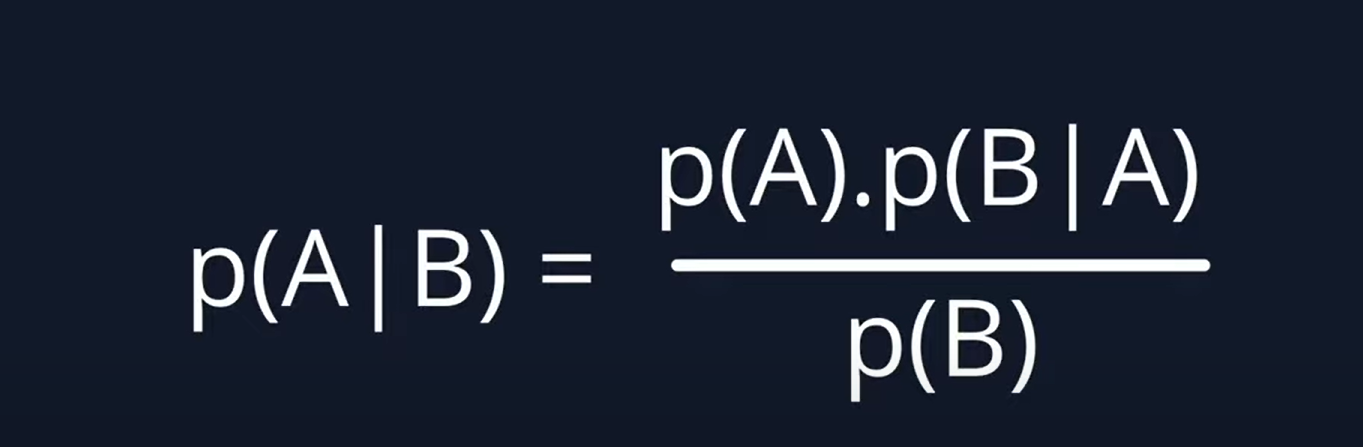


In [57]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_x_vector.toarray(), train_y)

GaussianNB()

# LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_x_vector, train_y)

LogisticRegression()

.

.

# EVALUACION DE LOS MODELOS

# SCORE

In [66]:
print(svc.score(test_x_vector, test_y))
print(dec_tree.score(test_x_vector, test_y))
print(gnb.score(test_x_vector.toarray(), test_y))
print(lr.score(test_x_vector, test_y))

0.8151515151515152
0.6954545454545454
0.6106060606060606
0.8075757575757576


# CONFUSION MATRIX

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_y, svc.predict(test_x_vector),
                 labels=['positive', 'negative'])

array([[271,  64],
       [ 58, 267]], dtype=int64)

# F1 SCORE

In [72]:
from sklearn.metrics import f1_score

f1_score(test_y, svc.predict(test_x_vector),
         labels=['positive', 'negative'],
         average=None)

array([0.81626506, 0.81402439])

.

.

# OPTIMIZACIÓN DEL MODELO CON GRIDSEARCHCV

El código utiliza GridSearchCV de la librería scikit-learn para realizar una búsqueda exhaustiva de los mejores hiperparámetros para un modelo de clasificación utilizando un enfoque de validación cruzada.


GridSearchCV es una herramienta para buscar automáticamente los mejores hiperparámetros de un modelo probando todas las combinaciones posibles definidas en una cuadrícula de parámetros.


C: Un hiperparámetro del modelo SVM (SVC) que controla la regularización. Valores más bajos significan más regularización.

kernel: Especifica el tipo de núcleo (o función de transformación) a utilizar. Puede ser linear (línea recta) o rbf (función de base radial, no lineal).




In [86]:
from sklearn.model_selection import GridSearchCV

paremetros = {'C':[1,4,8,16,32], 'kernel':['linear', 'rbf']}
svc = SVC()
svc_grid = GridSearchCV(svc, paremetros, cv=5)
svc_grid.fit(train_x_vector, train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 4, 8, 16, 32], 'kernel': ['linear', 'rbf']})

GridSearchCV toma:

svc: El modelo base.
parametros: La cuadrícula de hiperparámetros.
cv=5: Realiza validación cruzada con 5 particiones (folds). Esto divide los datos de entrenamiento en 5 partes, usa 4 para entrenar y 1 para validar en cada iteración.
Este paso genera combinaciones de parámetros:

Por ejemplo, prueba C=1 con kernel='linear', luego C=1 con kernel='rbf', y así sucesivamente para cada valor de C.

In [89]:
print(svc_grid.best_estimator_)
print(svc_grid.best_params_)

SVC(C=4)
{'C': 4, 'kernel': 'rbf'}


In [91]:
svc_grid.best_score_

0.8425373134328357